### 股票数据获取
目前，获取股票数据的渠道有很多，而且基本上是免费的，比如，行情软件有同花顺、东方财富等，门户网站有新浪财经、腾讯财经、和讯网等。Python也有不少免费的开源api可以获取交易行情数据，如pandas自带的库，tushare和baostock等。由于pandas库不再支持yahoo数据库后变得很不好用，而baostock最早记录的数据是2006年，因此本文主要讲讲如何使用tushare获取股票交易数据和可视化分析，tushare基本上记录了股票自上市之日起所有的日交易数据，是目前分析国内A股（还支持其他非股票行情数据，如期货）比较好用的开源接口。阅读本文之前，建议学习或回顾下【手把手教你】系列文章，熟悉掌握pandas、tushare、numpy和matplotlib等包的用法，不然后面代码阅读起来可能比较吃力。废话少说，直接撸代码。

In [1]:
#先引入后面可能用到的包（package）
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
#正常显示画图时出现的中文
from pylab import mpl
#这里使用微软雅黑字体
mpl.rcParams['font.sans-serif']=['SimHei']
#画图时显示负号
mpl.rcParams['axes.unicode_minus']=False
import seaborn as sns  #画图用的
import tushare as ts
#Jupyter Notebook特有的magic命令
#直接在行内显示图形
%matplotlib inline    

小试牛刀：获取上证指数自发布以来的数据

In [148]:
sh=ts.get_k_data(code='sh',ktype='D', autype='qfq', start='1990-12-20')
#code:股票代码，个股主要使用代码，如‘600000’
#ktype:'D':日数据；‘m’：月数据，‘Y’:年数据
#autype:复权选择，默认‘qfq’前复权
#start：起始时间
#end：默认当前时间
#查看下数据前5行
sh.head(5)

,date,open,close,high,low,volume,code
1,1990-12-20,113.1,113.5,113.5,112.85,1990.0,sh
2,1990-12-21,113.5,113.5,113.5,113.40,1190.0,sh
3,1990-12-24,113.5,114.0,114.0,113.30,8070.0,sh
4,1990-12-25,114.0,114.1,114.2,114.00,2780.0,sh
5,1990-12-26,114.4,114.3,114.4,114.20,310.0,sh


能看到的第一列是索引，对于pandas的数据结构，最后将索引设置为时间序列，方便后面可视化分析。

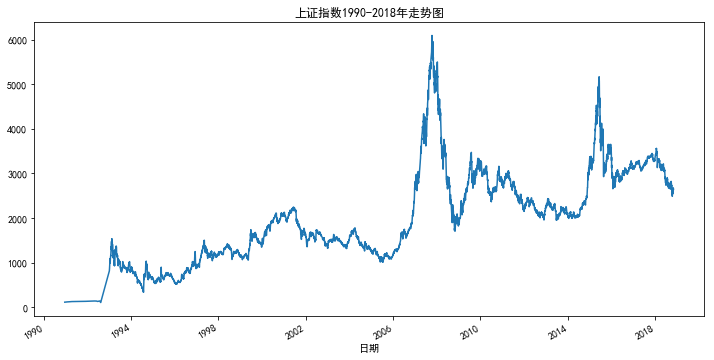

In [149]:
#将数据列表中的第0列'date'设置为索引
sh.index=pd.to_datetime(sh.date) 
#画出上证指数收盘价的走势
sh['close'].plot(figsize=(12,6))
plt.title('上证指数1990-2018年走势图')
plt.xlabel('日期')
plt.show()

上面的指数走势图还是可以清晰看出，股指分别在2007年和2015年有两波大牛市，然后又从高峰跌入谷底，目前处于下跌通道。真是辛辛苦苦28年，一夜回到解放前o(╥﹏╥)o

### 描述性统计

In [150]:
#pandas的describe()函数提供了数据的描述性统计
#count:数据样本，mean:均值，std:标准差
sh.describe().round(2)

,open,close,high,low,volume
count,6645.00,6645.00,6645.00,6645.00,6.645000e+03
mean,1936.27,1937.52,1954.79,1916.32,7.017764e+07
std,1078.13,1079.51,1089.42,1065.40,1.018642e+08
min,105.50,105.50,105.50,105.50,1.000000e+01
25%,1174.77,1174.80,1185.98,1162.31,5.103069e+06
50%,1744.04,1741.62,1755.69,1725.16,2.047380e+07
75%,2743.16,2744.07,2773.28,2712.30,1.086010e+08
max,6057.43,6092.06,6124.04,6040.71,8.571328e+08


从上述结果可以看出，上证指数从1990年12月20日至2018年11月7日（最后交易日是当前运行时间），一共有6645个样本，均值为1937.52点，标准差为1079.51点（波动还是比较大的），最大值是6092.06点。

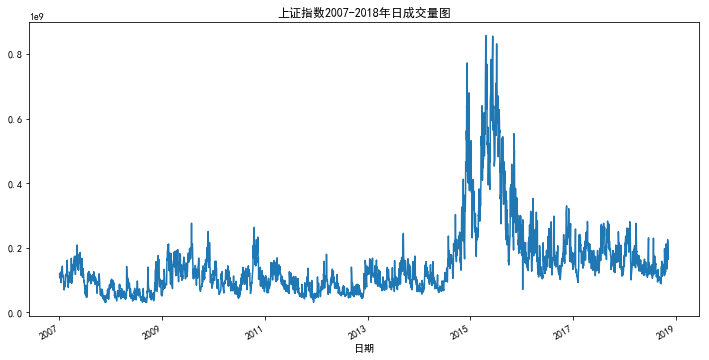

In [151]:
#再查看下每日成交量 
#2006年市场容量小，交易量比较小，我们从2007年开始看
sh.loc["2007-01-01":]["volume"].plot(figsize=(12,6))
plt.title('上证指数2007-2018年日成交量图')
plt.xlabel('日期')
plt.show()

上图的成交量反映了一个有趣的现象，2014-2015年的大牛市很可能是天量的交易推动起来的，因为这期间实体经济并不景气，央行多次降息降准，货币宽松，资金流入股市，银行理财等影子银行在这期间疯狂扩张，场外加杠杆和配资主导了这一场牛市。感兴趣的朋友可以结合货币供给、实体经济指标、影子银行等数据一起分析，进行交叉验证。

### 均线分析

In [152]:
#这里的平均线是通过自定义函数，手动设置20,52,252日均线
#移动平均线：
ma_day = [20,52,252]

for ma in ma_day:
    column_name = "%s日均线" %(str(ma))
    sh[column_name] =sh["close"].rolling(ma).mean()
sh.tail(3)

,date,open,close,high,low,volume,code,20日均线,52日均线,252日均线
date,,,,,,,,,,
2018-11-05,2018-11-05,2665.43,2665.43,2673.19,2639.27,193760100.0,sh,2603.3445,2678.619423,3073.374365
2018-11-06,2018-11-06,2660.72,2659.36,2660.86,2635.32,163669479.0,sh,2600.2620,2677.738077,3070.447619
2018-11-07,2018-11-07,2659.84,2641.34,2675.68,2639.25,173201986.0,sh,2596.0370,2677.206731,3067.407024


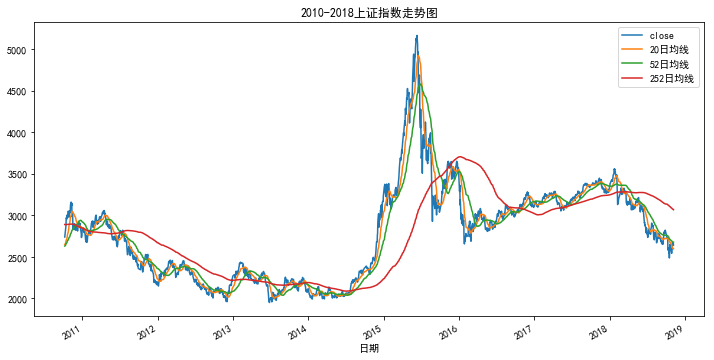

In [153]:
#画出2010年以来收盘价和均线图
sh.loc['2010-10-8':][["close","20日均线","52日均线","252日均线"]].plot(figsize=(12,6))
plt.title('2010-2018上证指数走势图')
plt.xlabel('日期')
plt.show()

### 上证指数的收益率和波动率

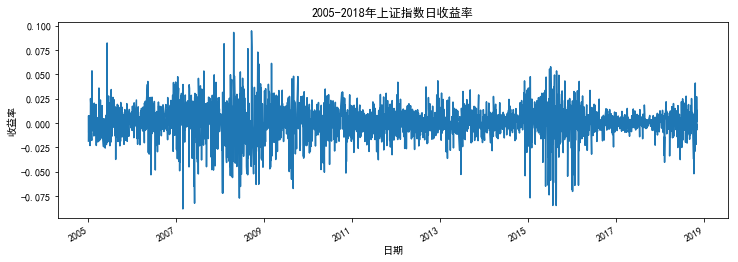

In [154]:
#2005年之前的数据噪音太大，主要分析2005年之后的
sh["日收益率"] = sh["close"].pct_change()
sh["日收益率"].loc['2005-01-01':].plot(figsize=(12,4))
plt.xlabel('日期')
plt.ylabel('收益率')
plt.title('2005-2018年上证指数日收益率')
plt.show()

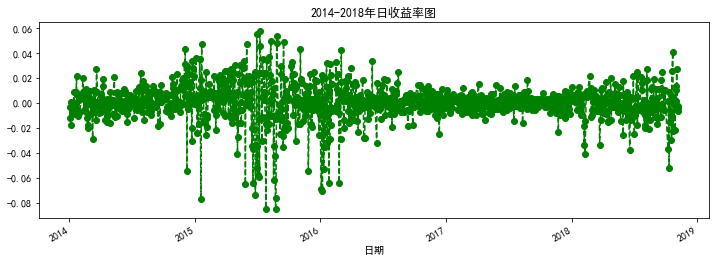

In [155]:
###这里我们改变一下线条的类型(linestyle)以及加一些标记(marker)
sh["日收益率"].loc['2014-01-01':].plot(figsize=(12,4),linestyle="--",marker="o",color="g")
plt.title('2014-2018年日收益率图')
plt.xlabel('日期')
plt.show()

### 多个股票指数（或者个股）情况

In [2]:
#分析下常见的几个股票指数
stocks={'上证指数':'sh','深证指数':'sz','沪深300':'hs300',
        '上证50':'sz50','中小板指':'zxb','创业板':'cyb'}
stock_index=pd.DataFrame()
for stock in stocks.values():
    stock_index[stock]=ts.get_k_data(stock,ktype='D', autype='qfq', start='2005-01-01')['close']

In [3]:
stock_index.head()

,sh,sz,hs300,sz50,zxb,cyb
0,1242.77,3025.42,1003.45,827.07,5788.976,997.119
1,1251.94,3052.86,995.42,831.43,5814.922,998.394
2,1239.43,3028.73,978.70,822.50,5666.934,1027.681
3,1244.75,3035.59,1000.90,823.62,5718.764,1069.468
4,1252.40,3062.73,986.97,832.99,5462.570,1067.154


In [4]:
#计算这些股票指数每日涨跌幅
tech_rets = stock_index.pct_change()[1:]
tech_rets.head()

,sh,sz,hs300,sz50,zxb,cyb
1,0.007379,0.009070,-0.008002,0.005272,0.004482,0.001279
2,-0.009992,-0.007904,-0.016797,-0.010741,-0.025450,0.029334
3,0.004292,0.002265,0.022683,0.001362,0.009146,0.040661
4,0.006146,0.008941,-0.013917,0.011377,-0.044799,-0.002164
5,0.004040,0.002233,-0.013060,0.005846,0.014144,0.009998


In [5]:
#收益率描述性统计
tech_rets.describe()

,sh,sz,hs300,sz50,zxb,cyb
count,3473.000000,3473.000000,3473.000000,3473.000000,3473.000000,3473.000000
mean,0.000414,0.000531,0.000558,0.000530,0.000179,0.000282
std,0.016393,0.018675,0.017347,0.017588,0.016950,0.015834
min,-0.088407,-0.092898,-0.092400,-0.094705,-0.084107,-0.089097
25%,-0.006635,-0.008337,-0.007018,-0.007481,-0.006081,-0.003028
50%,0.000775,0.000658,0.000703,0.000414,0.000000,0.000000
75%,0.008367,0.010202,0.008797,0.008783,0.007912,0.004372
max,0.094549,0.095942,0.093418,0.096731,0.097128,0.071586


In [6]:
#均值其实都大于0
tech_rets.mean()*100 #转换为%

sh       0.041366
sz       0.053125
hs300    0.055793
sz50     0.053008
zxb      0.017918
cyb      0.028230
dtype: float64

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


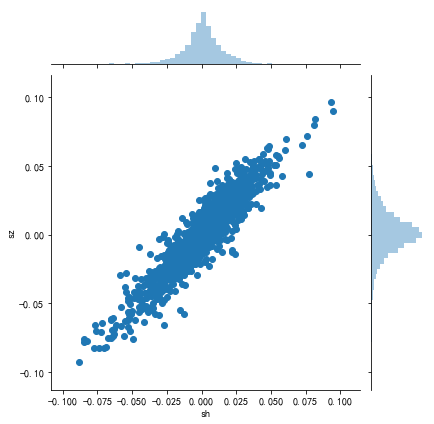

In [7]:
#jointplot这个函数可以画出两个指数的”相关性系数“，或者说皮尔森相关系数
sns.jointplot('sh','sz',data=tech_rets)


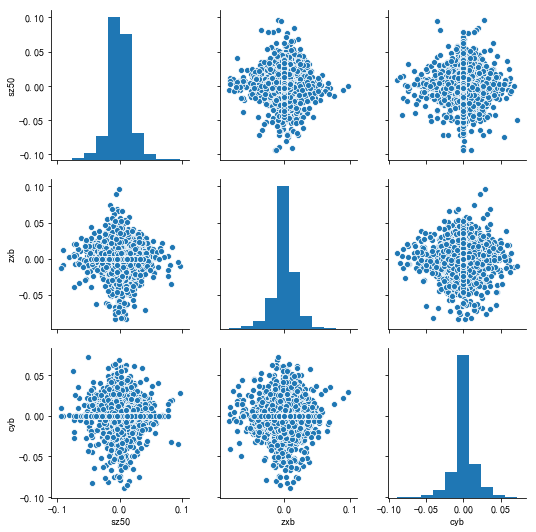

In [8]:
#成对的比较不同数据集之间的相关性，而对角线则会显示该数据集的直方图
sns.pairplot(tech_rets.iloc[:,3:].dropna())

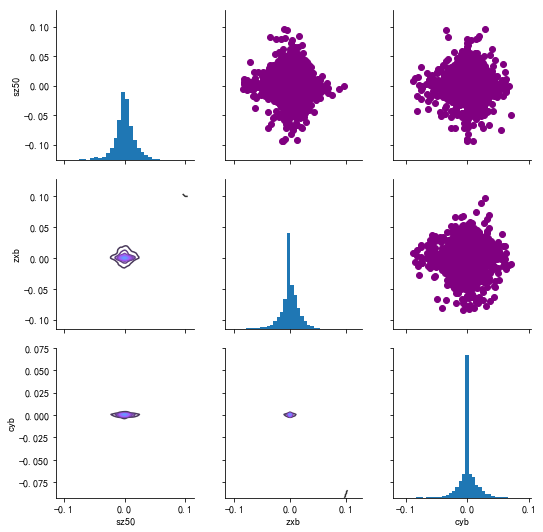

In [9]:
returns_fig = sns.PairGrid(tech_rets.iloc[:,3:].dropna())
  
###右上角画散点图
returns_fig.map_upper(plt.scatter,color="purple") 
 
###左下角画核密度图 
returns_fig.map_lower(sns.kdeplot,cmap="cool_d") 
 
###对角线的直方图 
returns_fig.map_diag(plt.hist,bins=30)

### 收益率与风险（标准差）

In [10]:
#构建一个计算股票收益率和标准差的函数
#默认起始时间为'2005-01-01'
def return_risk(stocks,startdate='2005-01-01'):
    close=pd.DataFrame()
    for stock in stocks.values():
        close[stock]=ts.get_k_data(stock,ktype='D', autype='qfq', start=startdate)['close']
    tech_rets = close.pct_change()[1:]
    rets = tech_rets.dropna()
    ret_mean=rets.mean()*100
    ret_std=rets.std()*100
    return ret_mean,ret_std

#画图函数
def plot_return_risk():
    ret,vol=return_risk(stocks)
    color=np.array([ 0.18, 0.96, 0.75, 0.3, 0.9,0.5])
    plt.scatter(ret, vol, marker = 'o', c=color,s = 500,cmap=plt.get_cmap('Spectral'))
    plt.xlabel("日收益率均值%")     
    plt.ylabel("标准差%")
    for label,x,y in zip(stocks.keys(),ret,vol):
        plt.annotate(label,xy = (x,y),xytext = (20,20),
            textcoords = "offset points",ha = "right",va = "bottom",
            bbox = dict(boxstyle = 'round,pad=0.5',
            fc = 'yellow', alpha = 0.5),
                arrowprops = dict(arrowstyle = "->",
                    connectionstyle = "arc3,rad=0"))

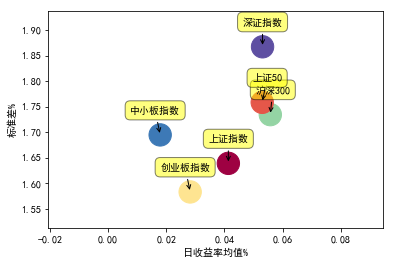

In [11]:
stocks={'上证指数':'sh','深证指数':'sz','沪深300':'hs300',
        '上证50':'sz50','中小板指数':'zxb','创业板指数':'cyb'}
plot_return_risk()

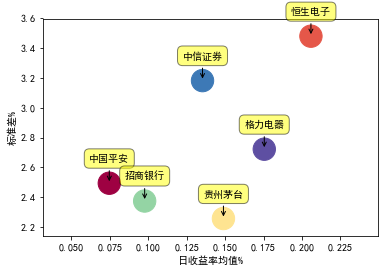

In [102]:
stocks={'中国平安':'601318','格力电器':'000651','招商银行':'600036',
        '恒生电子':'600570','中信证券':'600030','贵州茅台':'600519'}
startdate='2018-01-01'
plot_return_risk()

### 蒙特卡洛模拟分析

蒙特卡洛模拟是一种统计学方法，用来模拟数据的演变趋势。蒙特卡洛模拟是在二战期间，当时在原子弹研制的项目中，为了模拟裂变物质的中子随机扩散现象，由美国数学家冯·诺伊曼和乌拉姆等发明的一种统计方法。之所以起名叫蒙特卡洛模拟，是因为蒙特卡洛在是欧洲袖珍国家摩纳哥一个城市，这个城市在当时是非常著名的一个赌城。因为赌博的本质是算概率，而蒙特卡洛模拟正是以概率为基础的一种方法，所以用赌城的名字为这种方法命名。蒙特卡洛模拟每次输入都随机选择输入值，通过大量的模拟次数，最终得出一个累计概率分布图。

In [108]:
df=ts.get_k_data('sh',ktype='D', autype='qfq', start='2005-01-01')
df.index=pd.to_datetime(df.date)
tech_rets = df.close.pct_change()[1:]
rets = tech_rets.dropna()
rets.head()

date
2005-01-05    0.007379
2005-01-06   -0.009992
2005-01-07    0.004292
2005-01-10    0.006146
2005-01-11    0.004040
Name: close, dtype: float64

In [107]:
#下面的结果说明，我们95%的置信，一天我们不会损失超过0.0264...
rets.quantile(0.05)

-0.026496813699825043

In [111]:
#构建蒙特卡洛模拟函数
def monte_carlo(start_price,days,mu,sigma):
    dt=1/days
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
     
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu * dt,scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] *(drift[x] + shock[x]))
    return price

Text(0.5,1,'经过 252 天后上证指数模拟价格分布图')

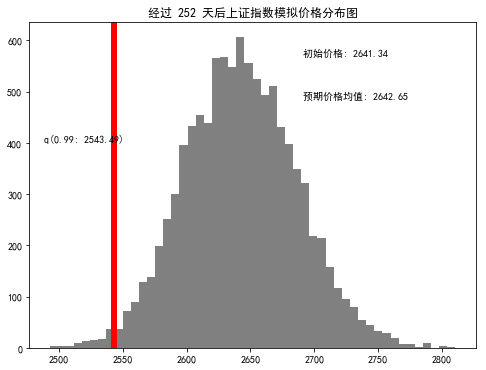

In [126]:
#模拟次数
runs = 10000
start_price = 2641.34 #今日收盘价
days = 252
mu=rets.mean()
sigma=rets.std()
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monte_carlo(start_price,days,mu,sigma)[days-1]
q = np.percentile(simulations,1)
plt.figure(figsize=(8,6))
plt.hist(simulations,bins=50,color='grey')
plt.figtext(0.6,0.8,s="初始价格: %.2f" % start_price)
plt.figtext(0.6,0.7,"预期价格均值: %.2f" %simulations.mean())
plt.figtext(0.15,0.6,"q(0.99: %.2f)" %q)
plt.axvline(x=q,linewidth=6,color="r")
plt.title("经过 %s 天后上证指数模拟价格分布图" %days,weight="bold")

实际上蒙特卡洛模拟在期权定价里面还是很有用的。我们借用期权定价里对未来股票走势的假定来进行蒙特卡洛模拟。

In [144]:
import numpy as np
from time import time
np.random.seed(2018)
t0=time()
S0=2641.34
T=1.0; 
r=0.05; 
sigma=rets.std()
M=50;
dt=T/M; 
I=250000
S=np.zeros((M+1,I))
S[0]=S0
for t in range(1,M+1):
    z=np.random.standard_normal(I)
    S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*z)
s_m=np.sum(S[-1])/I
tnp1=time()-t0
print('经过250000次模拟，得出1年以后上证指数的预期平均收盘价为：%.2f'%s_m)

经过250000次模拟，得出1年以后上证指数的预期平均收盘价为：2776.85


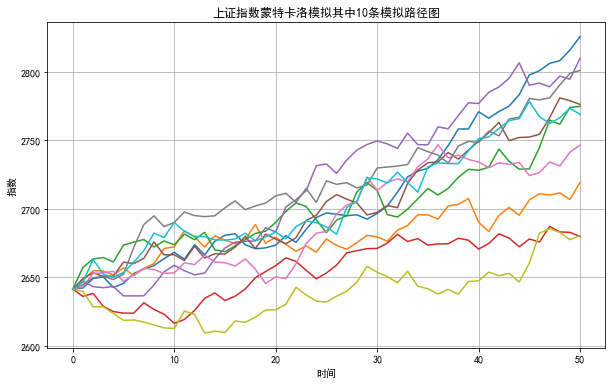

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(S[:,:10])
plt.grid(True)
plt.title('上证指数蒙特卡洛模拟其中10条模拟路径图')
plt.xlabel('时间')
plt.ylabel('指数')
plt.show()

Text(0.5,1,'上证指数蒙特卡洛模拟')

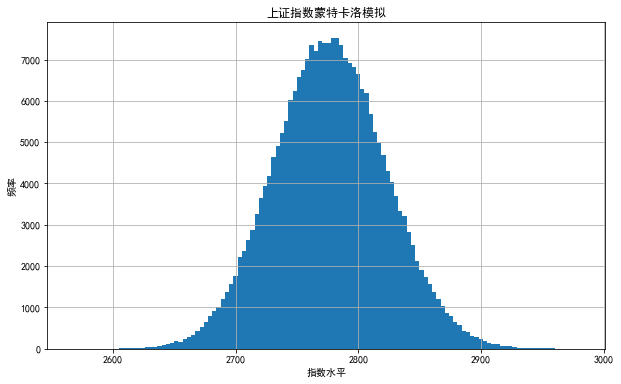

In [142]:
plt.figure(figsize=(10,6))
plt.hist(S[-1], bins=120)
plt.grid(True)
plt.xlabel('指数水平')
plt.ylabel('频率')
plt.title('上证指数蒙特卡洛模拟')